# Lab 8 and 9|

# Part 1: Compiling Sequencing Data

We first converted the illumina and pacbio reads into a contig fasta file and a scaffold fasta file. We did this by running the following command:

`spades -1 /data/lab8/illumina_reads_R1.fastq -2 /data/lab8/illumina_reads_R2.fastq --pacbio pacbio_reads.fastq -o . -t 1`

We let this run for a long time and then we got a contig fasta file output and a scaffold fasta file output

## Part 2: Analyzing the Data

Statistics for the reads were obtained by running:

`assembly-stats contigs.fasta scaffolds.fasta`

For the contigs:

the sum of the lengths = 6678635
the number of contigs = 176
N50 = 234690, n = 11

For the scaffolds:

the sum of the lengths = 6678655
the number of scaffolds = 174
N50 = 234690, n = 11

It is important to look at the N50 value because it is a measure of the quality of the sequencing of a genome. It represents the minimum length of contigs/scaffolds needed to cover 50% of the genome. (half of the genome is within contigs greater than or equal to the N50 value.) The mean/median lengths will not give you this data, but instead can be compared to the N50 value to see what percent of the reads contain half of the genome within itself. 

The scaffold length is approximately equal to the contig length. 

### Part 2 EC:

Histogram of number of times a contig was covered during assembly. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
reads=[]
headers=[]
coverage=[]
with open('contigs.fasta','rt') as input:
    for i in input:
        reads.append(i)
for i in ''.join(reads).split('>')[1:]:
    headers.append(i.split('\n')[0])
for i in headers:
    if '_' in i:
        coverage.append(float(i.split('_')[-1]))


Text(0.5, 1.0, 'Number of times contig was by reads used to assemble it')

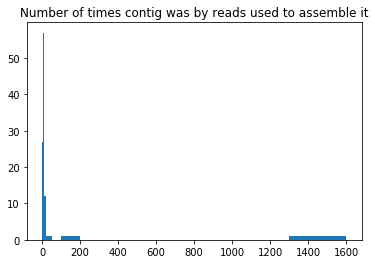

In [12]:
plt.hist(coverage,bins=[0,0.25,0.5,0.75,1,3,5,10,20,35,50,75,100,200,400,600,1300,1600])
plt.title('Number of times contig was by reads used to assemble it')

It looks like the distribution is skewed to the right, and so is not quite gaussian but it is close. It could be described as trimodal, since there are three main peaks, though the peaks at regions greater than ~100 are very small to the peak less than 100. Contigs that are very small would be expected to have greater coverage than those that are larger, coverage that could be an integer multiple of the mean coverage.

## Part 3: Identification of Taxon

I identified the regions corresponding to the 16sRNA gene by running the following:

`python /usr/bin/rna_hmm3.py -i contigs.fasta -o output.gff`

I then deleted every line in the GFF file that did not correspond to the 16sRNA sequence. I then ran the following to get the fasta sequences for the locations in the GFF file:

`bedtools getfasta -fi contigs.fasta -bed output.gff > 16sRNA.fasta`

The fasta file was then uploaded to the seqmatch tool, which is used for identifying species. I found that the genus was Pseudomonas. This is because all 6 of the sequences matched to species within the genus of pseudomonas. 

The contig genome file was then uploaded to RAST and BASys, and the outputs of these uploads were used to create the following research write-up.

## Part 4: Research Write-Up

Pseudomonas is a genus of gram-negative bacterium, containing many different species within it. There is a great amount of diversity within this genus, allowing for the individual species to be able to survive in a wide range of environmental niches. As such, there have evolved a variety of methods for protecting a host’s body from these bacteria. One such way has been observed through the actions of human adipose tissue-derived mesenchymal stem/stromal cells (AT MSCs). Researchers recently discovered that interactions between these cells and *Pseudomonas aeruginosa*, both of which are found at the sites of skin wounds, causes an inhibition of biofilm formation. Additionally, it was found that AT MSCs also bind to these bacteria, potentially an indication of the phagocytosis of these bacteria. In our analysis of the annotated genome of Pseudomonas, we found that these bacteria also secrete biofilm<sup>1</sup>. This is via the use of the exopolysaccharide biosynthesis pathway, in which this polymeric substance is secreted into the surrounding of the bacteria, allowing it to create a biofilm and adhere to its surroundings. 
Other studies have also investigated the use of drugs to specifically target the biofilm of Pseudomonas. In one study, they found that peptide dendrimers and Tob both are capable of targeting the *P. aeruginosa* biofilm cells, essentially acting as a possible antibiotic for patients at risk or currently undergoing infection from Pseudomonas<sup>2</sup>. Again this relates to the findings we discovered in our genome annotation, relating to the specific genes responsible for the creation of biofilm, including exopolysaccharide biosynthesis genes. 

1. Pompilio, A. et al. Peptide dendrimers as "lead compounds" for the treatment of chronic lung infections by Pseudomonas aeruginosa in cystic fibrosis patients: in vitro and in vivo studies. Infection and drug resistance. (2018). Available at: https://www.ncbi.nlm.nih.gov/pubmed/30349334. (Accessed: 25th October 2018)

2. Wood, C. R. et al. Human adipose tissue-derived mesenchymal stem/stromal cells adhere to and inhibit the growth of Staphylococcus aureus and Pseudomonas aeruginosa. Journal of Medical Microbiology (2018). doi:10.1099/jmm.0.000861
